In [ ]:
%pip install scikit-learn pandas matplotlib umap-learn seaborn
%pip install torch --index-url https://download.pytorch.org/whl/cu118

# HW 1 Logisitic Regression
# Task 1:

$\newcommand{\bfy}{\mathbf{y}}$
$\newcommand{\bfx}{\mathbf{x}}$
$\newcommand{\bfcx}{\mathbf{X}}$
$\newcommand{\bfw}{\mathbf{w}}$

A machine learning problem that I would like to solve with Logistic Regression is determinining whether a patient has breast cancer. Logistic Regression is the best choice for solving this problem because it is a binary classification problem and the  diagnosis and it gives a probability instead of only a classification.

Breast Cancer Dataset
https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data

In [2]:
import pandas as pd
import torch
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

seed = 42
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Task 2: Data Processing and Analysis

In [3]:
# Load data and preview of the data
data_dir = "data/breast-cancer.csv"
data = pd.read_csv(data_dir)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# Check to see what types and if there are any null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# Converting lablels to 0 and 1
labels = data["diagnosis"]
labels = labels.map({"B": 0, "M": 1})
data = data.drop(["id", "diagnosis"], axis=1)
data = data.astype(float)

We should check to see whether some of the features are highly correlated, if so the model might learn these correlations instead of generalizing over the rest of the features.

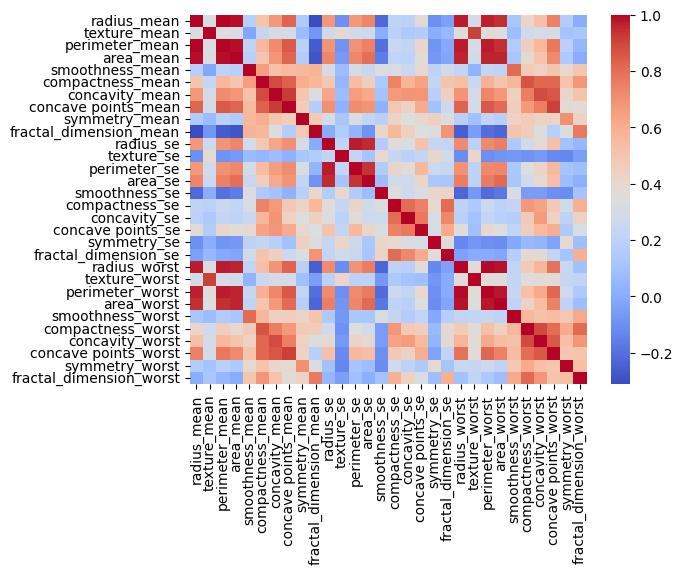

In [7]:
# Find correlations
corr = data.corr()
heatmap = sns.heatmap(corr, cmap="coolwarm", xticklabels=True, yticklabels=True)
plt.show()

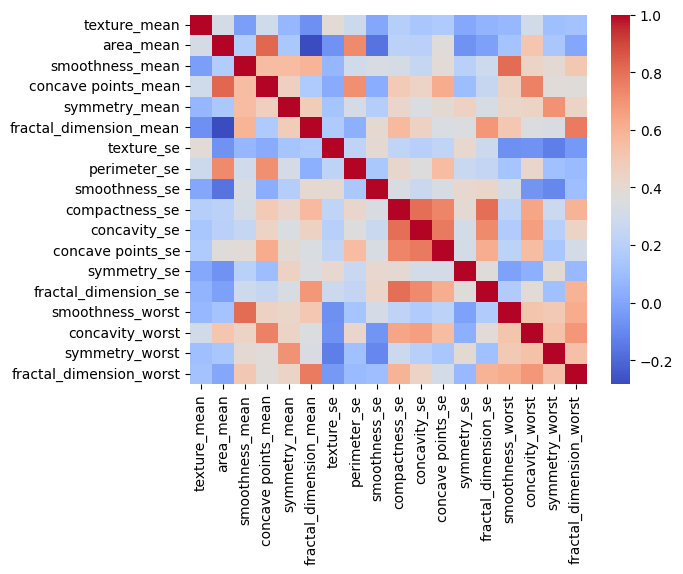

In [8]:
# Removing highly correlated features and correlating again
data = data.drop(["radius_mean", "perimeter_mean", "radius_se", "area_se", "radius_worst", "perimeter_worst", "compactness_mean", "concavity_mean", "concave points_worst", "compactness_worst", "texture_worst", "area_worst"], axis=1)
new_corr = data.corr()
sns.heatmap(new_corr, cmap="coolwarm", xticklabels=True, yticklabels=True)
plt.show()

In [9]:
# Train and test split to avoid overfitting
X_train_, X_test_, y_train_, y_test_ = train_test_split(torch.tensor(data.values), torch.tensor(labels.values), test_size=0.2, random_state=seed)

# Normalize the data to avoid gradient explosion and vanishing
mean = X_train_.mean()
std = X_train_.std()
X_train_ = (X_train_ - mean) / std
X_test_ = (X_test_ - mean) / std

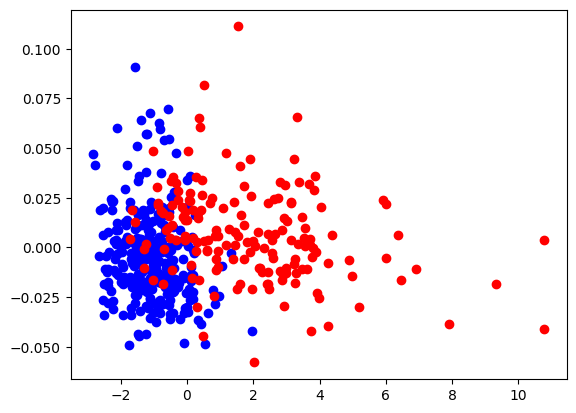

In [10]:
# Using PCA to reduce the dimensionality of the data to visualize it
pca = PCA(n_components=2)
pca.fit(X_train_)
transformed_X_train_ = pca.transform(X_train_)
plt.plot(transformed_X_train_[y_train_ == 0, 0], transformed_X_train_[y_train_ == 0, 1], "bo")
plt.plot(transformed_X_train_[y_train_ == 1, 0], transformed_X_train_[y_train_ == 1, 1], "ro")
plt.show()

/home/tyler/rpi/s24/pmlai/CSCI-4967-Projects-in-ML-AI/HW/HW1/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tyler/rpi/s24/pmlai/CSCI-4967-Projects-in-ML-AI/HW/HW1/.venv/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


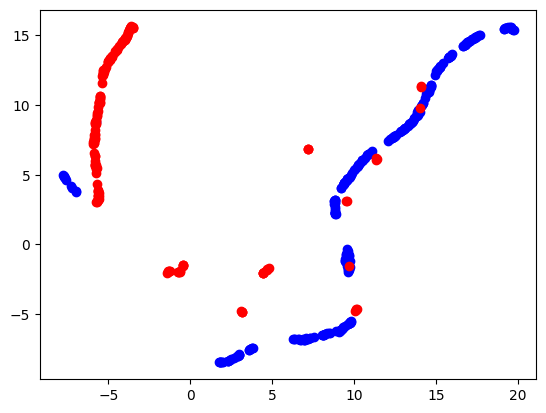

In [11]:
# UMAP also reduces the dimensionality of the data but it can be used for supervised clustering
from umap import UMAP
umap = UMAP(n_components=2, random_state=seed)
umap.fit(X_train_, y=y_train_)
transformed_X_train_ = umap.transform(X_train_)
plt.plot(transformed_X_train_[y_train_ == 0, 0], transformed_X_train_[y_train_ == 0, 1], "bo")
plt.plot(transformed_X_train_[y_train_ == 1, 0], transformed_X_train_[y_train_ == 1, 1], "ro")
plt.show()

# Task 3&4: Doing Logistic Regression
There are 4 methods that will be done:
- Batch GD
- Stochastic GD
- Batch GD w Momentum
- Batch Adam

`* All batched methods are with batch size of 32`

## Loss function
Using Cross Entropy Loss:
$$
L(\bfw) = y * \log(\hat{y}) + (1-y)*(\log(1-\hat{y}))
$$
where:
$$
\hat{y} = \sigma(z) = \frac{1}{1+e^{-z}}
$$
$$
z = \bfx^T\bfw + b
$$

## Calcuating the Gradient
$$
\frac{\partial L(\bfw)}{\partial\bfw}
=
\frac{\partial L(\bfw)}{\partial\hat{y}}
\frac{\partial\hat{y}}{\partial z}
\frac{\partial z}{\partial\bfw}
$$

Lets do the first term:
$$
\frac{\partial L(\bfw)}{\partial\hat{y}}
=
\frac{\partial}{\partial\hat{y}}
(y * \log(\hat{y}) + (1-y)*(\log(1-\hat{y})))
=
\left(
    \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}}
\right)
=
\frac{\hat{y}-y}{\hat{y}(1-\hat{y})} 
$$

The second term:
$$
\frac{\partial\hat{y}}{\partial z}
=
\frac{\partial}{\partial z}
\sigma(z)
=
\sigma(z)(1-\sigma(z))
=
\hat{y}(1-\hat{y})
$$

The third term:
$$
\frac{\partial z}{\partial\bfw}
=
\frac{\partial}{\partial\bfw}
(
\bfx^T\bfw+b
)
=
\bfx
$$

Combining together:
$$
\frac{\partial L(\bfw)}{\partial\bfw}
=
\frac{\partial L(\bfw)}{\partial\hat{y}}
\frac{\partial\hat{y}}{\partial z}
\frac{\partial z}{\partial\bfw}
=
\left[
    \frac{\hat{y}-y}{\hat{y}(1-\hat{y})} 
\right]
[\hat{y}(1-\hat{y})]
[\bfx]
=
(\hat{y}-y)\bfx
$$

## Gradient for the bias
$$
\frac{\partial z}{\partial b}
=
\frac{\partial}{\partial b}
(
\bfx^T\bfw+b
)
=
1
$$
$$
\frac{\partial L(\bfw)}{\partial b}
=
\frac{\partial L(\bfw)}{\partial\hat{y}}
\frac{\partial\hat{y}}{\partial z}
\frac{\partial z}{\partial b}
=
\left[
    \frac{\hat{y}-y}{\hat{y}(1-\hat{y})} 
\right]
[\hat{y}(1-\hat{y})]
[1]
=
(\hat{y}-y)
$$


In [12]:
def loss(y_pred_, y_):
    eps = 1e-8
    return -torch.mean(y_ * torch.log(y_pred_ + eps) + (1 - y_) * torch.log(1 - y_pred_ + eps))

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def set_seeds(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [13]:
# Batch GD
# Global hyperparameters
epochs = 1000
batch_size = 32

# Hyperparameters
lr = 0.01

set_seeds(seed)
bgd_losses = []
epoch_loss = 0
w = torch.randn(X_train_.shape[1], dtype=torch.double)
b = torch.randn(1, dtype=torch.double)
for epoch in tqdm(range(epochs)):
    # randomized reshuffling
    rr_indicies = torch.randperm(X_train_.shape[0])
    for batch in range(X_train_.shape[0] // batch_size):
        batch_indices = rr_indicies[batch * batch_size: (batch + 1) * batch_size]
        X_batch_, y_batch_ = X_train_[batch_indices], y_train_[batch_indices]
        y_pred_ = sigmoid(X_batch_ @ w + b)
        sub = y_pred_ - y_batch_
        w -= lr * X_batch_.T @ sub / y_pred_.shape[0]
        b -= lr * sub.mean()
        batch_loss = loss(y_pred_, y_batch_)
        epoch_loss += batch_loss
    bgd_losses.append(epoch_loss / X_train_.shape[0])
    epoch_loss = 0
tqdm.write(f"Final loss: {epoch_loss / X_train_.shape[0]}")
# plt.title("Batch GD Loss")
# plt.xlabel("Epochs")
# plt.xscale("log")
# plt.plot(bgd_losses)
# plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 1632.74it/s]

Final loss: 0.0


In [14]:
# Testing and Evaluation
#   Evaluation metrics will be displayed at the end of the notebook
def do_testing(y_pred_):
    true_pos = torch.sum((y_pred_ > 0.5) & y_test_.bool())
    true_neg = torch.sum((y_pred_ <= 0.5) & (y_test_.bool() == False))
    false_pos = torch.sum((y_pred_ > 0.5) & (y_test_.bool() == False))
    false_neg = torch.sum((y_pred_ <= 0.5) & y_test_.bool())
    total = y_pred_.shape[0]

    def accuracy():
        return (true_pos + true_neg) / total
    
    def precision():
        return true_pos / (true_pos + false_pos)
    
    def recall():
        return true_pos / (true_pos + false_neg)
    
    def f1():
        return 2 * precision() * recall() / (precision() + recall())
    
    def specificity():
        return true_neg / (true_neg + false_pos)
    
    eval_values = [accuracy(), precision(), recall(), f1(), specificity()]
    return torch.Tensor(eval_values)

ctr = 0
summary = torch.zeros((4, 5))
summary[ctr] = do_testing(sigmoid(X_test_ @ w + b))

In [15]:
# SGD
# Hyperparameters
lr = 0.01

set_seeds(seed)
epoch_loss = 0
sgd_losses = []
w = torch.randn(X_train_.shape[1], dtype=torch.double)
b = torch.randn(1, dtype=torch.double)
for epoch in tqdm(range(epochs)):
    # randomized reshuffling
    rr_indicies = torch.randperm(X_train_.shape[0])
    for batch in range(X_train_.shape[0] // 1):
        batch_indices = rr_indicies[batch: (batch + 1)]
        X_batch_, y_batch_ = X_train_[batch_indices], y_train_[batch_indices]
        y_pred_ = sigmoid(X_batch_ @ w + b)
        sub = y_pred_ - y_batch_
        w -= lr * X_batch_.T @ sub / y_pred_.shape[0]
        b -= lr * sub.mean()
        batch_loss = loss(y_pred_, y_batch_)
        epoch_loss += batch_loss
    sgd_losses.append(epoch_loss / X_train_.shape[0])
    epoch_loss = 0
tqdm.write(f"Final loss: {epoch_loss / X_train_.shape[0]}")
# plt.title("Stochastic GD Loss")
# plt.xlabel("Epochs")
# plt.xscale("log")
# plt.plot(sgd_losses)
# plt.show()

ctr += 1
summary[ctr] = do_testing(sigmoid(X_test_ @ w + b))

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:18<00:00, 53.90it/s]

Final loss: 0.0


In [16]:
# Batch GD with Momentum
# Hyperparameters
lr = 0.01
gamma = 0.9

set_seeds(seed)
epoch_loss = 0
bgdm_losses = []
w = torch.randn(X_train_.shape[1], dtype=torch.double)
b = torch.randn(1, dtype=torch.double)
v_w = torch.zeros_like(w)
v_b = torch.zeros_like(b)
for epoch in tqdm(range(epochs)):
    rr_indicies = torch.randperm(X_train_.shape[0])
    for batch in range(X_train_.shape[0] // batch_size):
        batch_indices = rr_indicies[batch * batch_size: (batch + 1) * batch_size]
        X_batch_, y_batch_ = X_train_[batch_indices], y_train_[batch_indices]
        y_pred_ = sigmoid(X_batch_ @ w + b)
        sub = y_pred_ - y_batch_
        v_w = gamma * v_w + lr * X_batch_.T @ sub / y_pred_.shape[0]
        v_b = gamma * v_b + lr * sub.mean()
        w -= v_w
        b -= v_b
        batch_loss = loss(y_pred_, y_batch_)
        epoch_loss += batch_loss
    bgdm_losses.append(epoch_loss / X_train_.shape[0])
    epoch_loss = 0
tqdm.write(f"Final loss: {epoch_loss / X_train_.shape[0]}")
# plt.title("Batch GD w/ Momentum Loss")
# plt.xlabel("Epochs")
# plt.xscale("log")
# plt.plot(bgdm_losses)
# plt.show()

ctr += 1
summary[ctr] = do_testing(sigmoid(X_test_ @ w + b))

100%|██████████| 1000/1000 [00:00<00:00, 1527.88it/s]

Final loss: 0.0


In [17]:
# Adam
# Hyperparameters
lr = 0.01
beta1 = 0.9
beta2 = 0.999
eps = 1e-8

set_seeds(seed)
epoch_loss = 0
adam_losses = []
w = torch.randn(X_train_.shape[1], dtype=torch.double)
b = torch.randn(1, dtype=torch.double)
m_w = torch.zeros_like(w)
m_b = torch.zeros_like(b)
v_w = torch.zeros_like(w)
v_b = torch.zeros_like(b)
for epoch in tqdm(range(epochs)):
    rr_indicies = torch.randperm(X_train_.shape[0])
    for batch in range(X_train_.shape[0] // batch_size):
        batch_indices = rr_indicies[batch * batch_size: (batch + 1) * batch_size]
        X_batch_, y_batch_ = X_train_[batch_indices], y_train_[batch_indices]
        y_pred_ = sigmoid(X_batch_ @ w + b)
        sub = y_pred_ - y_batch_ 
        m_w = beta1 * m_w + (1 - beta1) * X_batch_.T @ sub / y_pred_.shape[0]
        m_b = beta1 * m_b + (1 - beta1) * sub.mean()
        v_w = beta2 * v_w + (1 - beta2) * (X_batch_.T @ sub / y_pred_.shape[0]).pow(2)
        v_b = beta2 * v_b + (1 - beta2) * (sub.mean()).pow(2)
        m_w_hat = m_w / (1 - beta1 ** (epoch + 1))
        m_b_hat = m_b / (1 - beta1 ** (epoch + 1))
        v_w_hat = v_w / (1 - beta2 ** (epoch + 1))
        v_b_hat = v_b / (1 - beta2 ** (epoch + 1))
        w -= lr * m_w_hat / (v_w_hat.sqrt() + eps)
        b -= lr * m_b_hat / (v_b_hat.sqrt() + eps)
        batch_loss = loss(y_pred_, y_batch_)
        epoch_loss += batch_loss
    adam_losses.append(epoch_loss / X_train_.shape[0])
    epoch_loss = 0
tqdm.write(f"Final loss: {epoch_loss / X_train_.shape[0]}")
# plt.title("Batch Adam Loss")
# plt.xlabel("Epochs")
# plt.xscale("log")
# plt.plot(adam_losses)
# plt.show()

ctr += 1
summary[ctr] = do_testing(sigmoid(X_test_ @ w + b))

100%|██████████| 1000/1000 [00:01<00:00, 925.09it/s]

Final loss: 0.0


# Summary
Here is a summary of all the evaluation metrics
- White -> Green: Lowest to highest
- Blue: Best for that metric

In [18]:
df = pd.DataFrame(summary, index=["Batch GD", "Stochastic GD", "Batch GD w Momentum", "Batch Adam"], columns=["Accuracy", "Precision", "Recall", "F1", "Specificity"])
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm, axis=0).format("{:.2%}").highlight_max(axis=0, color="blue")

,Accuracy,Precision,Recall,F1,Specificity
Batch GD,92.98%,97.30%,83.72%,90.00%,98.59%
Stochastic GD,92.98%,97.30%,83.72%,90.00%,98.59%
Batch GD w Momentum,92.11%,94.74%,83.72%,88.89%,97.18%
Batch Adam,90.35%,90.00%,83.72%,86.75%,94.37%


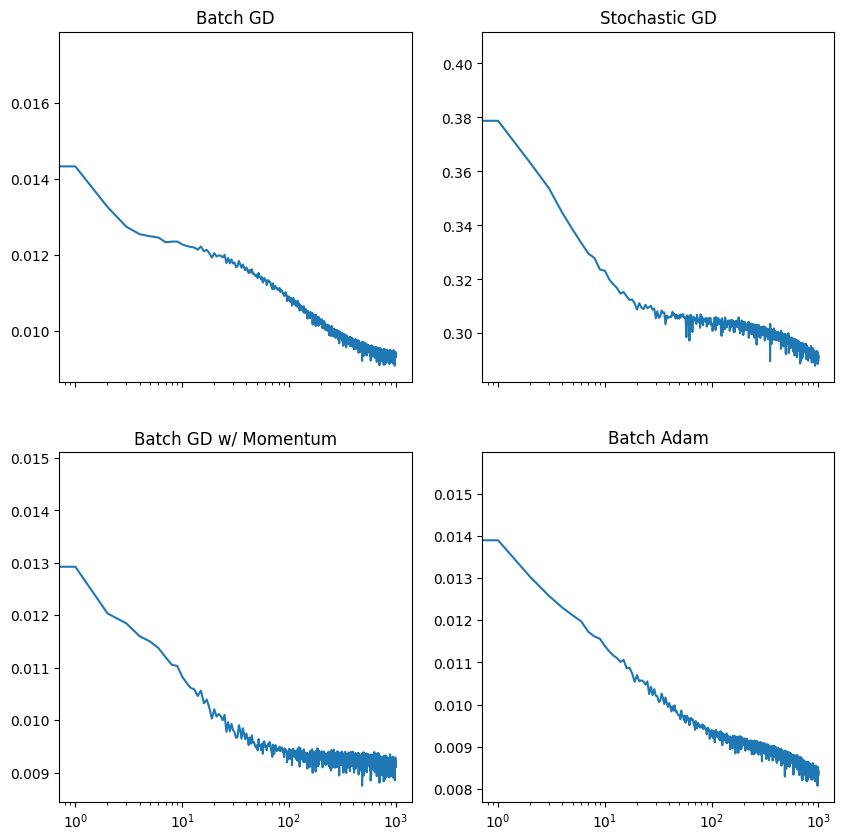

In [19]:
# Plot losses
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=False)
plt.xscale("log")
axs[0, 0].plot(bgd_losses)
axs[0, 0].set_title("Batch GD")
axs[0, 1].plot(sgd_losses)
axs[0, 1].set_title("Stochastic GD")
axs[1, 0].plot(bgdm_losses)
axs[1, 0].set_title("Batch GD w/ Momentum")
axs[1, 1].plot(adam_losses)
axs[1, 1].set_title("Batch Adam")
plt.show()

- We can see that SGD does the best for generalization for the dataset in all evaluation metrics which makes sense due to its stochastic nature. However, the methods with momentum learn the fastest and reach a low loss in a fraction of the epochs compared to SGD.
- The lower accuracy of the momentum might be due to that the optimized algos with momentum reach the optimal weights too fast and is now overfitting on the training dataset since the number of epochs is kept the same between methods.
- We should use an optimzation algo such as Adam or GD with Momentum (Newton's Heavy Ball Method) which improves the standard GD and can improve the speed of reaching a good generalization without having to do the compute cost of doing so many updates that SGD does.